In [30]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
data = pd.read_csv("dataset.csv")
data.head()

,w0,w1,w2,w3,a0,a1,a2,a3,b0,b1,b2,b3,direction
0,200,400,200,400,0,0,0,0,0,0,0,0,1.0
1,200,396,200,404,0,0,0,0,0,0,0,0,1.0
2,200,392,200,408,0,0,0,0,0,0,0,0,1.0
3,200,388,200,412,0,0,0,0,0,0,0,0,1.0
4,200,384,200,416,0,0,0,0,0,0,0,0,1.0


In [32]:
data = data.dropna()
data.isnull().sum()

,0
w0,0
w1,0
w2,0
w3,0
a0,0
a1,0
a2,0
a3,0
b0,0
b1,0


In [33]:

X = data[["w0","w1","w2","w3","a0","a1","a2","a3","b0","b1","b2","b3"]].values
Y = data[["direction"]].values

X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.1, random_state=4)
Y_one_hot_train = to_categorical(Y_train, num_classes=4)
Y_one_hot_test = to_categorical(Y_test, num_classes=4)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((19858, 12), (2207, 12), (19858, 1), (2207, 1))

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(12,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(optimizer="adam",
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

In [36]:
result_train = model.fit(X_train , Y_one_hot_train , epochs=60)

Epoch 1/60
621/621 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4136 - loss: 6.0891
Epoch 2/60
621/621 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7916 - loss: 0.6029
Epoch 3/60
621/621 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8705 - loss: 0.4129
Epoch 4/60
621/621 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9147 - loss: 0.2547
Epoch 5/60
621/621 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9148 - loss: 0.2580
Epoch 6/60
621/621 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9458 - loss: 0.1630
Epoch 7/60
621/621 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9414 - loss: 0.1948
Epoch 8/60
621/621 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9436 - loss: 0.1926
Epoch 9/60
621/621 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9461 - loss: 0.1844
Epoch 10/60
621/621 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9578 - loss: 0.1436
Epoch 11/60
621/621 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9584 - loss: 0.1551
Epoch 12/60
621/621 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

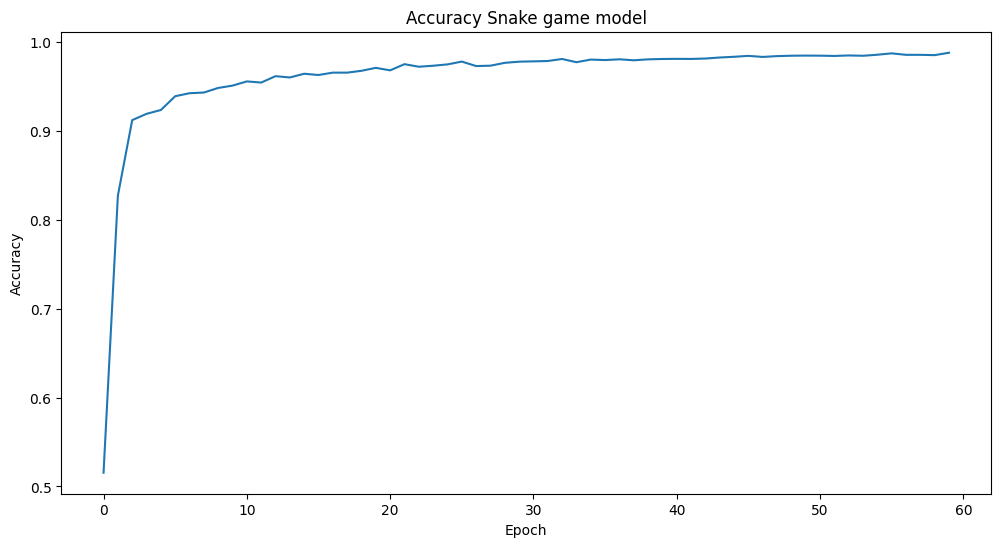

In [37]:
plt.figure(figsize=(12,6))
plt.plot(result_train.history["accuracy"])
plt.title("Accuracy Snake game model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

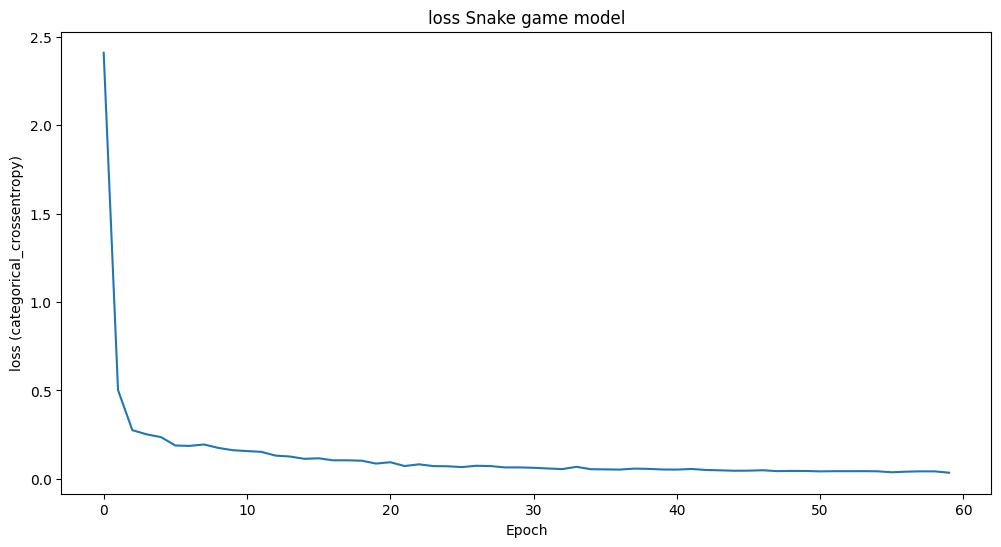

In [38]:

plt.figure(figsize=(12,6))
plt.plot(result_train.history["loss"])
plt.title("loss Snake game model")
plt.xlabel("Epoch")
plt.ylabel("loss (categorical_crossentropy)")
plt.show()

In [45]:
model.save("Snake_game_model_ML_ANN_Classification.h5")